In [2]:
import pandas as pd
df = pd.read_excel('041_회귀_기본_결정계수_이해.xlsx', sheet_name=0)
# df.head()

In [3]:
df

,공부시간,성적
0,1,50
1,2,52
2,3,54
3,4,56
4,5,60
5,6,67
6,7,74
7,8,81
8,9,88
9,10,98


In [4]:
dataset = df.values

In [5]:
print('type of dataset: ',type(dataset))

type of dataset:  <class 'numpy.ndarray'>


In [6]:
dataset.shape # 행, 열
#print(dataset.shape)

(10, 2)

In [7]:
dataset.ndim # dataframe 스타일이 2차원이다.

2

### ndarray에서 원하는 열 가져오기

In [9]:
# 독립변수 처리
# 독립변수는 최소 1개 이상 이다. 그래서 항상 엑셀 테이블 형태(2차원)로 생겼다고 생각하는게 좋다.
# 어차피 현업에서는 독립변수가 1개인 경우는 거의 없다.

X = dataset[:,0:1] # 행, 열
print(X[:5])
print("")
print('shape:', X.shape)
print('차원:', X.ndim)

[[1]
 [2]
 [3]
 [4]
 [5]]

shape: (10, 1)
차원: 2


^C


In [3]:
y = dataset[:,1]
y
#df.iloc[:,-1].value_counts()

NameError: name 'dataset' is not defined

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# 데이터가 몇개 안되서
X_train, X_test, y_train, y_test = X, X, y, y

In [12]:
print(X_train.shape)
print(y_train.shape)

(10, 1)
(10,)


In [15]:
import numpy as np
import pandas as pd

In [16]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

### train data로 예측해보기
어떤 의미가 있는가?   
학습한 데이터로 평가해보자. 음...   
답을 다 가르쳐 졌으니???  

In [18]:
y_predict = model_lr.predict(X_train) 
r2 = metrics.r2_score(y_train, y_predict)
print(r2) 

0.9424364123159303


### 모형이 얼마나 설명력을 갖는가?
결정계수는 0~1사이의 값을 가지며, 높은 값을 가질수록 추정된 모델의 설명력이 높다.  
독립변수가 종속변수 변동의 몇 %를 설명하는가를 나타내는 지표이다.

다변량 회귀분석에서는 독립변수의 수가 많아질수록   
독립변수가 유의하든 유의하지 않든 결정계수가 높아지는 단점이 있다.  
이러한 단점을 보완하기 위해 수정결정계수(adjusted R^2)를 사용  
수정결정계수 = 1- (n-1)(1-r2)/(n-k-1)  
k: 독립변수의 개수, n:데이터의 개수

In [19]:
# metrics.r2_score?  # R^2 (coefficient of determination) regression score function.

In [25]:
y_predict

array([44.        , 49.33333333, 54.66666667, 60.        , 65.33333333,
       70.66666667, 76.        , 81.33333333, 86.66666667, 92.        ])

### 결정계수는 어떻게 계산되는가?
쓸데 없이 어려워 지는 것이 아닌가?

<img src="figures/결정계수_계산.PNG" alt="Drawing" style="width: 800px;"/>

결정계수 = 2,358/2,490 = 0.94

In [6]:
2358/2490

0.946987951807229

In [ ]:
Regression model의 성능을 측정하기 위해 mean value로 예측하는 단순 모델(ZeroR 모델)과 비교, 
상대적으로 얼마나 성능이 나오는지를 측정한 지표.

### 왜 저런 계산식을 가지게 되었는가?
저것의 의미가 무엇인가? @@@

<img src="figures/결정계수_계산_com2.PNG" alt="Drawing" style="width: 700px;"/>

![R2](https://miro.medium.com/max/207/0*0Zn3CVdTkt7ml3Ax)  
![SST](https://miro.medium.com/max/356/0*i8JfBnEUOSu2US71)  

*source of image : https://miro.medium.com/max*

In [ ]:
전체제곱합은 평균으로 부터의 거리

In [ ]:
https://newsight.tistory.com/259

### r2 는 어떻게 해석하는 거니 ?
@@@

[결정계수(in wikipedia)](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95%EA%B3%84%EC%88%98)

결정계수(決定係數, 영어: coefficient of determination)는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도이다.   
반응 변수의 변동량 중에서 적용한 모형으로 설명가능한 부분의 비율을 가리킨다. 

![Image](https://mblogthumb-phinf.pstatic.net/MjAxODA4MDZfMTQ3/MDAxNTMzNTMyMjQxNTM1.Y9BEVY5Uv748_luCRr0GSH2UqhsAkoHoat--nQ9Vz0Ig.X08d5hcP-5J9R3RNaA5nUgajoriSIbbaNMa9uz4GZn0g.PNG.statsol/r2_1.png?type=w800)  
*source of image : https://m.blog.naver.com/statsol/221333530305*

In [ ]:
위의 그림을 보면 
설명력이 좋은 경우는 위 그림과 같이 실제 데이터가 회귀직선에 매우 밀접???하게 분포됩니다.
즉, 잔차의 크기가 매우 작으며, 예측되는 값의 정밀도가 높아 집니다.
설명력이 좋은 경우나 나쁜경우나 회귀직선은 동일하지만, 잔차의 크기가 매우 크기 때문에
예측되는 값의 정밀도가 나빠집니다.

참고로 잔차(residual)란 실측값과 예측값의 차이를 의미하는데요, 실제 데이터의 y값에서 
회귀직선의 y값을 차감한 수치를 의미합니다. 

### 기울기, 절편
@@@ 이게 뭐니?

In [20]:
#기울기 coef_
model_lr.coef_

array([5.33333333])

In [21]:
# 절편
model_lr.intercept_

38.66666666666667

In [22]:
df

,공부시간,성적
0,1,50
1,2,52
2,3,54
3,4,56
4,5,60
5,6,67
6,7,74
7,8,81
8,9,88
9,10,98


### test

In [23]:
y_predict = model_lr.predict(X_test) 
score = metrics.r2_score(y_test, y_predict)
print(score) 

0.9424364123159303


In [24]:
y_predict

array([44.        , 49.33333333, 54.66666667, 60.        , 65.33333333,
       70.66666667, 76.        , 81.33333333, 86.66666667, 92.        ])

In [33]:
import matplotlib.pyplot as plt

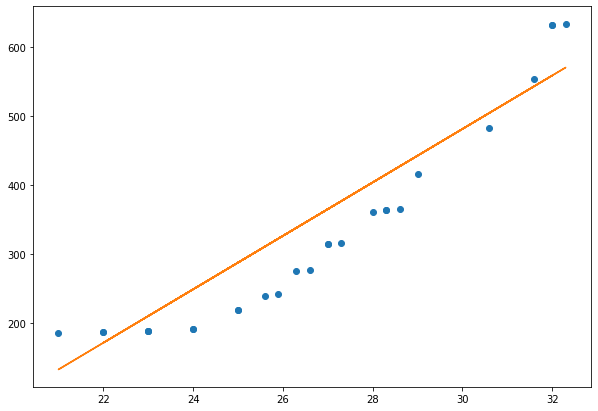

In [34]:
fig = plt.figure(figsize=(10,7))
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, model_lr.predict(X_test))
plt.show()